## 2.1　Python解释器
Python是一种解释型语言。Python解释器通过一次执行一条语句来运行程序。标准的交互式Python解释器可以通过在命令行输入python命令来启动。

> 但是今天才发现ipython其实更强大，命令行中就可以进行补全操作。

通过Python命令，再把.py文件作为第一个参数就可以非常方便地运行Python程序。

虽然一些Python编程者通过这种方式执行代码，但是那些做数据分析或科学计算的人士则会使用IPython和Jupyter notebook。IPython是一个加强版的Python解释器，Juypyter notebook是一种基于Web的代码笔记本，最初也是源于IPython项目。当使用%run命令时，IPython会在同一个进程内执行指定文件中的代码，确保在执行完成时可以立即探索结果。

## 2.2　IPython基础

### 2.2.1　运行IPython命令行
通过ipython命令启动IPython命令行，将Python语句输入命令行，然后按下回车键运行。当在IPython中仅输入一个变量名，它会返回一个表示该对象的字符串。

In [1]:
import numpy as np
data = {i : np.random.randn() for i in range(7)}
data

{0: 0.2607260872960113,
 1: -0.6084172439806098,
 2: -0.3837085718748372,
 3: -1.1076644446680244,
 4: 0.7205745300852894,
 5: -0.8285179494173556,
 6: -0.33588214388782006}

与常见的print打印语句不同，IPython中大多数Python对象被格式化为更可读、更美观的形式。如果使用print方法在标准Python解释器中打印data变量，可读性会差一些。

In [2]:
print(data)

{0: 0.2607260872960113, 1: -0.6084172439806098, 2: -0.3837085718748372, 3: -1.1076644446680244, 4: 0.7205745300852894, 5: -0.8285179494173556, 6: -0.33588214388782006}


IPython还提供执行任意代码块（通过复制粘贴实现）和整个Python脚本的功能。也可以使用Jupyter notebook来处理大段的代码块。

### 2.2.2　运行Jupyter notebook
Jupyter项目中的主要组件就是notebook，这是一种交互式的文档类型，可以用于编写代码、文本（可以带标记）、数据可视化以及其他输出。Jupyter notebook与内核交互，内核是编程语言的交互式计算协议的实现。Python的Jupyter内核使用IPython系统进行内部活动。

需要启动Jupyter时，可以在终端中运行`jupyter notebook`命令。在很多平台上，Jupyter会自动打开默认网络浏览器（除非使用了`--no-browser`命令）。可以通过http地址来浏览notebook，默认地址是http://localhost:8888/ 。

点击新建按钮选择“Python 3”或者“conda[default]”即可新建一个笔记本，尝试点击空的代码“单元”，输入一行Python代码，然后按下Shift-Enter来执行。

当保存笔记本的时候（在File菜单下有“Save and Checkpoint”选项），会自动生成一个后缀名为.ipynb的文件。这种文件格式会包含笔记本中当前的所有内容（包括已经产生的代码输出）。这些内容可以被其他的Jupyter用户载入、编辑。要载入一个已经存在的笔记本，可以将文件放置在启动命令行进程的路径下（或者是该路径下的子文件夹中），然后在登录页面双击文件名。

尽管Jupyter notebook提供了与IPython命令行不同的体验，但几乎所有的命令和工具都可以在两种环境下使用。

### 2.2.3　Tab补全
相较于标准Python命令行，IPython的提升之一就是tab补全功能，通常该功能在IDE或者其他交互式计算分析环境中才有。当在命令行输入表达式时，按下Tab键即可为任意变量（对象、函数等）搜索命名空间，与目前已输入的字符进行匹配。还可以在输入英文的句号之后，按下tab，对方法、属性的名称进行补全。

在Jupyter notebook和新版的IPython（5.0及以上）中，自动补全是在下拉选项中展现，而不是文本输出。

> IPython默认情况下隐藏了以下划线开始的方法和属性，诸如魔术方法、内部“私有”方法和属性，以避免杂乱的显示（使新手混淆）。这些你当然也是可以使用tab补全的，但是必须先输入下划线才能看到它们。如果你总是想在tab补全时直接看到它们，则需要修改IPython配置。参见IPython官方文档可以找到相关内容。

tab补全除了在搜索交互命名空间和补全对象或模块属性时有用，在很多其他上下文场景中也有用。当输入任意路径（甚至是Python字符串）时，按下Tab键将补全计算机文件系统中匹配你输入内容的值。

tab补全的另一个应用场景是在函数的关键字参数（包含=号）中节约时间。

### 2.2.4　内省
在一个变量名的前后使用问号（？）可以显示一些关于该对象的概要信息。

In [3]:
a = [1,2,3]
a?

如果对象是一个函数或实例方法且文档字符串已经写好，则文档字符串会显示出来。

In [4]:
def add_numbers(a, b):
    """
    Add two numbers together
    Returns
    -------
    the_sum : type of arguments
    """
    return a + b

# 使用？来显示文档字符串
add_numbers?
# 使用双问号？？可以显示函数的源代码
add_numbers??

`?`有一个终极用途，可以像标准Unix或Windows命令行一样搜索IPython命名空间。把一些字符和通配符（星号`*`）结合在一起，会显示所有匹配通配符表达式的命名。

In [5]:
import numpy as np
np.*load*?

```
np.__loader__
np.load
np.loads
np.loadtxt
```

### 2.2.5　%run命令
在IPython会话中使用%run命令运行任意的Python程序文件。

脚本是在空白命名空间（没有导入模块或其他定义变量）中运行的，因此这个行为与在命令行中使用`python script.py`来运行程序是相同的。文件中定义的所有变量（导入的、函数中的、全局定义的）在运行后，可以在IPython命令行中使用（除非出现某种异常）。

如果一个Python脚本需要命令行提供参数（通过sys.argv获得），那么则需要在命令行的文件路径后面加上参数进行传递。

> 如果想让待运行的脚本使用交互式IPython命名空间中已有的变量，请使用`%run -i`替代普通的%run命令。

在Jupyter notebook中，如果想将脚本导入一个代码单元，可以使用%load魔术函数。

#### 2.2.5.1　中断运行中的代码
在任意代码运行时按下Ctrl-C，无论脚本是通过%run或是其他长命令运行的，都将引起KeyboardInterrupt。除了某些特殊情况，这将导致所有的Python程序立即停止运行。

> 当一段Python代码被其他已经编译的扩展模块调用时，按下Ctrl-C并不会让程序立即停止运行。在这些情况下，需要等到控制流重新返回Python解释器，在更糟糕的情况下可能要强制结束Python进程。

### 2.2.6　执行剪贴板中的程序


如果使用Jupyter notebook，可以将代码复制粘贴到代码单元，然后运行。在IPython中可以直接运行剪贴板中的程序。
最简单的方法就是%paste和%cpaste魔术函数。%paste会获得剪贴板中的所有文本，并在命令行中作为一个代码块去执行。
%cpaste与之类似，只不过它会给出一个特殊的提示符，用来粘贴代码。
使用%cpaste，可以自由地在执行代码前尽可能多地粘贴代码。也许会想着使用%cpaste在执行前看下粘贴的代码，如果发现粘贴的代码有误，可以按下Ctrl-C来中断%cpaste提示符。

### 2.2.7　终端快捷键
IPython有很多用于浏览提示、查看历史命令的快捷键（Emacs文本编辑器和Unix bash命令行的使用者会很熟悉）。


|      快捷键      |              功能               |
| --------------- | ------------------------------ |
| Ctr-P或向上箭头  | 以当前输入内容开始,向后搜索历史命令 |
| Ctrl-N或向下箭头 | 以当前输入內容开始,向前搜索历史命令 |
| Ctrl-R          | 按行读取的反向历史搜索(部分匹配)   |
| Ctrl-Shift-V   | 从剪贴板粘贴文本                 |
| Ctrl-C          | 中断当前正在执行的代码            |
| CtrI-A          | 将光标移动到本行起始位置           |
| Ctrl-E          | 将光标移动到本行结束位置           |
| Ctrl-K          | 删除光标后本行的所有内容           |
| Ctrl-U          | 删除当前行                       |
| Ctrl-F          | 将光标向前移动一个字符            |
| Ctrl-B          | 将光标向后移动一个字符            |
| Ctrl-L          | 清除本屏内容                     |

> Jupyter notebook有一个独立的快捷键集合用于导航和编辑。由于Jupyter notebook的快捷键更新比IPython更为频繁，建议使用Jupyter notebook集成在菜单栏中的帮助系统。

### 2.2.8　关于魔术命令
IPython的特殊命令（没有内建到Python自身中去）被称为“魔术”命令。这些命令被设计用于简化常见任务，确保用户更容易控制IPython系统的行为。魔术命令的前缀符号是百分号%。例如，你、可以使用%timeit来检查一段Python语句的执行时间，比如一个矩阵操作

In [6]:
a =  np.random.randn(100,100)
%timeit np.dot(a,a)

The slowest run took 7.51 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 68.9 µs per loop


魔术命令可以看作是IPython系统内部的命令行程序。大多数魔术命令都可以使用`?`查看额外的“命令行”选项。

In [7]:
%debug?

魔术函数也可以不加百分号`%`就使用，只要没有变量被定义为与魔术函数相同的名字即可。这种特性被称为自动魔术，通过`%automagic`进行启用/禁用。

一些魔术函数也像Python函数一样，其输出可以赋给一个变量。

In [8]:
%pwd
foo = %pwd
print("Now in Directory: {}".format(foo))

Now in Directory: /home/zhuangbin/OneDrive/ProjectSpace/Jupyter/Python3/利用Python进行数据分析


由于IPython的文档可以在系统内访问，建议使用`%quickref`或者`%magic`探索所有的特殊命令。下表是在IPython中高效进行交互式计算和Python开发所常用的重要命令。

|        命令        |                          描述                           |
| ------------------ | ------------------------------------------------------ |
| %quickref          | 显示 IPython快速参考卡                                   |
| %magic             | 显示所有可用魔术命令的详细文档                             |
| %debug             | 从最后发生报错的底部进入交互式调试器                       |
| %hist              | 打印命令输入（也可以打印输出）历史                           |
| %pdb               | 出现任意报错后自动进入调试器                              |
| %paste             | 从剪贴板中执行已经预先格式化的 Python代码                  |
| %cpaste            | 打开一个特殊提示符,手动粘贴待执行的 Python代码             |
| %reset             | 删除交互式命名空间中所有的变量/名称                        |
| %page OBJECT       | 通过分页器更美观地打印显示一个对象                         |
| %run script.py     | 在 IPython中运行一个 Python脚本                          |
| %prun statement    | 使用 CProfile执行语句，并报告输出                         |
| % time statement   | 报告单个语句的执行时间                                    |
| %timeit statement  | 多次运行单个语句计算平均执行时间；在估算代码最短执行时间时有用 |
| %who,%who_ls,%whos | 根据不同级别的信息/详细程度,展示交互命名空间中定义的变量     |
| %xdel variable     | 在 IPython内部删除一个变量，清除相关的引用                  |

### 2.2.9　　matplotlib集成
IPython能在分析计算领域流行的原因之一，就是它和数据可视化、用户界面库（如matplotlib）的良好集成。`%matplotlib`魔术函数可以设置matplotlib与IPython命令行或Jupyter notebook的集成。这个命令很重要，否则创建的图可能不会显示（notebook），或者直到结束也无法控制会话（命令行）。

在IPython命令行中，运行`%matplotlib`命令可以生成多个绘图窗口，而无须干扰控制台的会话。

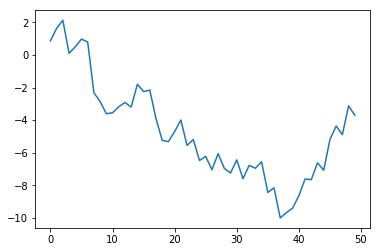

In [9]:
# IPython中使用
# %matplotlib

# Jupyter中使用
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(np.random.randn(50).cumsum())
plt.show()

## 2.3　Python语言基础
面对有基础的同学，这里的笔记快速浏览。

### 2.3.1　语言语义
Python语言的设计非常独特，它侧重于可读性、易用性及清晰性。一部分人则认为它是“可执行的伪代码”。

#### 2.3.1.1　缩进，而不是大括号

Python使用缩进（tab或者空格）来组织代码，而不是像其他语言比如R、C++、Java和Perl那样用大括号。

一个冒号代表一个缩进代码块的开始，单个代码块中所有的代码必须保持相同的缩进，直到代码块结束。

缩进使Python的代码更具可读性。

> 强烈推荐使用四个空格作为默认缩进，而不是用tab。很多文本编辑器可以设置用空格替代tab。有些人使用tab或者其他数量的空格，但使用两个空格的并不常见。对大多数Python编程者来说，四个空格是标准形式，因此在非特殊原因下推荐使用四个空格来缩进。

目前为止，Python语句都不是以分号结尾的。然而分号也是可以用于在一行内将多条语句之间进行分隔。

> 不鼓励在Python中将多条语句写成一行，因为这样会使代码可读性下降。

In [10]:
a = 5; b = 6; c = 7; print(a,b,c)

5 6 7


#### 2.3.1.2　一切皆为对象

Python语言的一个重要特征就是对象模型的一致性。每一个数值、字符串、数据结构、函数、类、模块以及所有存在于Python解释器中的事物，都是Python对象。每个对象都会关联到一种类型（例如字符串、函数）和内部数据。在实践中，一切皆为对象使得语言非常灵活，甚至函数也可以被当作对象来操作。

#### 2.3.1.3　注释

所有写在#号之后的文本会自动被Python解释器忽略。因此通常使用#在代码中添加注释。有时候会想排除部分代码但又不想删除，一个简单的解决办法就是把代码注释掉。

注释也可以写在一行被执行代码的后面。部分编程者更习惯把注释写在特定的一行后面，这在很多时候有用。

#### 2.3.1.4　函数和对象方法的调用

调用函数时，向函数括号里传递0或多个参数，通常会把返回值赋值给一个变量；

几乎所有的Python对象都有内部函数，称为方法，可以访问到对象内部的内容。可以通过以下语法调用：`obj.some_method(x, y, z)`

函数传参既可以是位置参数也可以是关键字参数：`result = f(a, b, c, d=5, e='foo')`

#### 2.3.1.5　变量和参数传递

在Python中对一个变量（或者变量名）赋值时，就创建了一个指向等号右边对象的引用。

In [11]:
a = [1, 2, 3]
b = a
a.append(4)
print(b)

[1, 2, 3, 4]


理解Python引用语义中复制数据的时机、方法和原因的机制，对于利用Python处理大数据集尤其重要。

> `赋值`也被称为`绑定`，这是因为将一个变量名绑定到了一个对象上。已被赋值的变量名有时也会被称为被绑定变量。

当将对象作为参数传给一个函数时，指向原始对象的新的本地变量就会被创建而无须复制。如果将一个新的对象绑定到一个函数内部的变量上，这种变更不会在上级范围中产生影响。因此，更换可变参数的内部值是可以做到的。

In [12]:
def append_element(some_list, element):
    some_list.append(element)

data = [1,2,3,4]
append_element(data, [1,2,3])
print(data)

[1, 2, 3, 4, [1, 2, 3]]


#### 2.3.1.6　动态引用、强类型

与Java、C++等大多数编译型语言不同，Python中的对象引用并不涉及类型。以下操作是没有问题的：

In [13]:
a = 5
print(type(a))
a = 'foo'
print(type(a))

<class 'int'>
<class 'str'>


变量对于对象来说只是特定命名空间中的名称；类型信息是存储在对象自身之中的。一些人可能会急于将Python总结为“非类型化语言”。这并不准确，考虑以下示例：

In [14]:
'5' + 5

TypeError: must be str, not int

在某些语言中，例如Visual Basic中，字符串'5'可能会隐式地转换为整数，然后得到10。而在另一些语言中，例如JavaScript，数字5可能会转换成字符串，生成一个结合字符串'55'。在这里，Python被认为是强类型语言，这意味着所有的对象都拥有一个指定的类型（或类），隐式的转换只在某些特定、明显的情况下发生：

In [20]:
a = 4.5
b = 2

# 字符串格式化, 用于后面访问
print('a is {0}, b is {1}'.format(type(a), type(b)))
print(a / b)

a is <class 'float'>, b is <class 'int'>
2.25


了解对象的类型是非常重要的，写出可以处理多种不同输入的函数是非常有用的。可以使用`isinstance`函数来检查一个对象是否是特定类型的实例。

In [21]:
a = 5
isinstance(a, int)

True

isinstance接受一个包含类型的元组，可以检查对象的类型是否在元组中的类型中：

In [22]:
a = 5; b = 4.5
print(isinstance(a, (int, float)))

print(isinstance(b, (int, float)))

True
True


#### 2.3.1.7　属性和方法

Python中的对象通常都会有属性（Python对象“内部”存储的其他对象）和方法（与对象内部对象有关的函数，相关的对象可以连接到对象内部数据）。属性和方法都可以通过形如obj.attribute_name的语法进行调用。

属性和方法也可以通过getattr函数获得。

In [23]:
a = 'foo'
getattr(a, 'lower')

<function str.lower>

在其他的语言中，通过变量名访问对象通常被称为`反射`。虽然这里不会广泛使用getattr以及相关的hasattr和setattr函数，但它们可以用来高效地编写通用、可复用的代码。

#### 2.3.1.8　鸭子类型

通常情况下并不关心某个对象的具体类型，而是关心它是否拥有某个特殊的方法或行为。“鸭子类型”的说法源于“一个东西走起来像鸭子叫起来像鸭子，那它就是鸭子”。例如，可以验证一个对象如果实现了迭代器协议，那它一定是可以迭代的。对于很多对象来说，包含了一个`__iter__`魔术方法，但使用iter函数是一个更好的、独立的方法：

In [24]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # 不可遍历
        return False
    
print(isiterable('a string'))
print(isiterable([1,2,3,4]))
print(isiterable(5))

True
True
False


对于绝大部分Python容器类型的对象，iter函数都会返回True。

在编写接受多种类型输入的函数时，可以使用这个功能。常见的案例就是写接受任意序列类型（列表、元组、n维数组），甚至是一个迭代器的函数时使用这项功能。可以先检查对象是否是一个列表（或者一个NumPy数组），如果不是就把它转换为列表：

In [25]:
x = (1,2,3,4,5)
if not isinstance(x, list) and isiterable(x):
    x = list(x)
print(x)

[1, 2, 3, 4, 5]


#### 2.3.1.9　导入

在Python中，模块就是以.py为后缀名并包含Python代码的文件。假如想从另一个相同路径下的文件连接到some_module.py中定义的变量和函数，可以`import some_module`或者`from some_module import some_function`。通过使用as关键字，还可以对导入内容给予不同的变量名`from some_module import some_function as sf`。

#### 2.3.1.10　二元运算符和比较运算

大部分二元数学运算操作和比较运算都和预想的一致：

In [26]:
print(5 - 7)
print(12 + 21.5)
print(5 <= 2)

-2
33.5
False


检查两个`引用`是否指向同一个对象，可以使用is关键字。is not在检查两个对象不是相同对象时也是有效的。

In [27]:
a = [1, 2, 3]
b = a
c = list(a)
print(a is b)
print(a is c)
print(a == c)

True
False
True


因为list函数总是创建一个新的Python列表（即一份拷贝），可以确定c与a是不同的。is和`==`是不同的，`==`是比较值的。

`is`和`is not`的常用之处是检查一个变量是否为`None`，因为`None`只有一个实例。

In [28]:
a = None
print(a is None)
print(a == None)

True
True


|    操作符     |              描述               |
| ------------ | ------------------------------ |
| a+b          | a加b                            |
| a-b          | a减b                            |
| a * b        | a乘b                            |
| a/ b         | a除以b                          |
| a // b       | a整除以b                        |
| a**b         | a的b次方                        |
| a&b          | a与b:对于整数则是按位AND          |
| a            | b                              |
| a^b          | 对布尔值,a异或b;对整数则是按位异或  |
| a==b         | a和b相等则为True                 |
| a !=b        | a和b不相等则为True               |
| a <=b, a<b   | 小于等于,小于                    |
| a > b, a >=b | 大于,大于等于                    |
| a is b       | a和b是同一个 Python对象则为True   |
| a is not b   | a和b不是同一个 Python对象则为True |

#### 2.3.1.11　可变对象和不可变对象

Python中的大部分对象，例如列表、字典、NumPy数组都是可变对象，大多数用户定义的类型（类）也是可变的。可变对象中包含的对象和值是可以被修改的：

In [29]:
a_list = ['foo', 2, [4, 5]]
print(a_list)
a_list[2] = (3, 4)
print(a_list)

['foo', 2, [4, 5]]
['foo', 2, (3, 4)]


还有其他一些对象是不可变的，比如字符串、元组：

In [30]:
a_tuple = (3, 5, (4, 5))
a_tuple[1] = 'four'

TypeError: 'tuple' object does not support item assignment

> 修改一个对象不代表应该那么做。修改行为通常会有副作用。
> 当编写一个函数时，任何副作用都应当显式地在函数的文档或注释中告诉使用者。如果可能的话，建议使用不可变性，避免副作用，尽管不可变对象中也可能包含可变对象。

### 2.3.2　标量类型
Python的标准库中拥有一个小的内建类型集合，用来处理数值数据、字符串、布尔值（True或False）以及日期和时间。这类的“单值”类型有时被称为标量类型，我们在本书中称之为标量。表2-4是主要的标量类型。由于标准库中含有datetime模块，日期和时间的处理将单独讨论。

#### 2.3.2.1　数值类型

基础的Python数字类型就是int和float。int可以存储**任意大小**数字：

In [31]:
ival = 17239871
ival ** 16

60889749756607041319584282250319236572596499349598097097140367087195038881671394421546087172462057235003540539345921

浮点数在Python中用float表示，每一个浮点数都是双精度64位数值。它们可以用科学计数法表示：

In [32]:
fval = 7.243
fval2 = 6.78e-5
print(fval, fval2)

7.243 6.78e-05


整数除法会把结果自动转型为浮点数：

In [33]:
print(3 / 2)

1.5


如果需要C风格的整数除法（去除了非整数结果的小数部分），可以使用整除操作符//：

In [34]:
print(3 // 2)

1


#### 2.3.2.2　字符串

很多人是因为Python强大、灵活的内建字符串操作功能而使用Python的。可以用单引号`'`或双引号`"`写一个字符串字面值：

In [35]:
a = 'one way of writing a string'
b = "another way"

对于含有换行的多行字符串，可以使用三个单引号`'''`或三个双引号`"""`：

In [36]:
c = """
This is a longer string that
spans multiple lines
"""

字符串c实际上包含了四行文本；`"""`后的换行和lines后的换行都是包含在字符串中的。可以使用count方法来计算c的回车符：

In [37]:
c.count('\n')

3

Python的字符串是不可变的，无法修改一个字符串：

In [38]:
a = 'this is a string'
# 操作后，变量a就是不可修改的
a[10] = 'f'

TypeError: 'str' object does not support item assignment

很多Python对象可以通过str函数转成字符串：

In [39]:
a = 5.6
s = str(a)
print(s)

5.6


字符串是Unicode字符的序列，因此可以被看作是除了列表和元组外的另一种序列：

In [40]:
s = 'python'
print(list(s))
print(s[:3])

['p', 'y', 't', 'h', 'o', 'n']
pyt


`s[：3]`这种语法被称为切片，在多种Python序列中都有实现。

反斜杠符号`\`是一种转义符号，它用来指明特殊符号，比如换行符号`\n`或Unicode字符。如果要在字符串中写反斜杠则需要将其转义：

In [41]:
s = '12\\34'
print(s)

12\34


如果有一个不含特殊符号但含有大量反斜杠的字符串时，会很麻烦。可以在字符串前面加一个前缀符号r，表明这些字符是原生字符（raw）：

In [42]:
s = r'this\has\no\special\characters'
print(s)

this\has\no\special\characters


将两个字符串结合到一起产生一个新字符串：

In [43]:
a = 'this is the first half '
b = 'and this is the second half'
print(a + b)

this is the first half and this is the second half


字符串格式化是另一个重要主题。Python 3中进行字符串格式化的方式又拓展了。下面简明地介绍主流方式中的一种。字符串对象拥有一个format方法，可以用来代替字符串中的格式化参数，并产生一个新的字符串：

In [44]:
template = '{0:.2f} {1:s} are worth US${2:d}'

在这个字符串中，
* {0：.2f}表示将第一个参数格式化为2位小数的浮点数
* {1：s}表示将第二个参数格式化为字符串
* {2：d}表示将第三个参数格式化整数

为了替代这些格式化参数，将含有参数的序列传给format方法。

In [45]:
template.format(4.5560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth US$1'

字符串格式化是一个深奥的主题；有多种方式和大量的选项可用于控制如何把值格式化到结果字符串中。如果要深入地了解这些，参考Python官方文档（https://docs.python.org/3.6/library/string.html ）。

#### 2.3.2.3　字节与Unicode

在现代Python中（此处指Python 3.0及以上），Unicode成为字符串类型的一等类，用于更好地兼容处理ASCII和非ASCII文本。在Python的早期版本中，字符串完全是字节，而没有显式的Unicode编码。如果知道字符的编码，就可以将其转换为Unicode。

In [46]:
val = "español"
print(val)

español


可以使用enocde方法将这个Unicode字符串转换为UTF-8字节:

In [47]:
val_utf8 = val.encode('utf-8')
print(val_utf8)
print(type(val_utf8))

b'espa\xc3\xb1ol'
<class 'bytes'>


假设知道一个字节对象的Unicode编码，可以再使用decode方法进行解码：

In [48]:
val_utf8.decode('utf-8')

'español'

由于偏好使用UTF-8编码的人越来越多，可能会因为历史遗留问题在数据中碰到一些不同的编码：

In [49]:
print(val.encode('latin1'))
print(val.encode('utf-16'))
print(val.encode('utf-16le'))

b'espa\xf1ol'
b'\xff\xfee\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'
b'e\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'


在文件的上下文中，最常遇到的就是bytes（字节）对象，在字节对象中并不想让所有的数据都隐式地解码为Unicode字符串。

可以在字符串前加前缀b来定义字符文本，尽管可能很少需要这么做：

In [50]:
bytes_val = b'this is bytes'
print(bytes_val)
decoded = bytes_val.decode('utf8')
print(decoded)

b'this is bytes'
this is bytes


#### 2.3.2.4　布尔值

Python中的布尔值写作True和False。比较运算和其他条件表达式的结果为True或False。布尔值可以与and和or关键字合用：

In [51]:
True and True

True

In [52]:
False or True

True

#### 2.3.2.5　类型转换
str、bool、int和float既是数据类型，同时也是可以将其他数据转换为这些类型的函数：

In [53]:
s = '3.14159'
fval = float(s)
print(type(fval))
print(int(fval))
print(bool(fval))
print(bool(0))

<class 'float'>
3
True
False


#### 2.3.2.6　None

`None`是Python的null值类型。
> 如果一个函数没有显式地返回值，则它会隐式地返回None。

In [54]:
a = None
a is None
b = 5
b is not None

True

None还可以作为一个常用的函数参数默认值：

In [55]:
def add_and_maybe_multiply(a, b, c=None):
    result = a + b

    if c is not None:
        result = result * c

    return result    

从技术角度来说，None不仅是一个关键字，还是NoneType类型的唯一实例：

In [56]:
print(type(None))

<class 'NoneType'>


#### 2.3.2.7　日期和时间

Python中内建的datetime模块，提供了datetime、data和time类型。datetime类型是包含日期和时间信息的，最常用的方法是：

In [57]:
from datetime import datetime, date, time
dt = datetime(2020, 10, 29, 20, 30, 21)
print(dt.day)
print(dt.minute)

29
30


对于datetime实例，可以分别使用date和time方法获取它的date和time对象：

In [58]:
print(dt.date())

dt.time()

2020-10-29


datetime.time(20, 30, 21)

strftime方法将datetime转换为字符串

In [59]:
print(dt.strftime('%m/%d/%Y %H:%M'))

10/29/2020 20:30


字符串可以通过strptime函数转换为datetime对象：

In [60]:
datetime.strptime('20091031', '%Y%m%d')

datetime.datetime(2009, 10, 31, 0, 0)

在聚合或分组时间序列数据时，会常常用到替代datetime时间序列中的一些值，比如将分钟、秒替换为0：

In [61]:
dt.replace(minute=0, second=0)

datetime.datetime(2020, 10, 29, 20, 0)

由于datetime.datetime是不可变类型，以上的方法都是产生新的对象。

两个不同的datetime对象相减会产生一个datatime.timedelta类型的对象：

In [62]:
dt2 = datetime(2020, 11, 15, 22, 30)
delta = dt2 - dt
print(delta)
print(type(delta))

17 days, 1:59:39
<class 'datetime.timedelta'>


输出的timedelta（17，7179）表示时间间隔为17天又7，179秒。

将timedelta加到一个datetime上将产生一个新的对象。

In [63]:
dt + delta

datetime.datetime(2020, 11, 15, 22, 30)

| 格式 | 描述                                                                    |
| ---- | ----------------------------------------------------------------------- |
| %Y   | 四位的年份                                                               |
| %y   | 两位的年份                                                               |
| %m   | 两位的月份\[01,12\]                                                      |
| %d   | 两份的天数值\[01,31\]                                                    |
| %H   | 小时值(24小时制)\[00,23                                                  |
| %I   | 小时值(12小时制)\[01,12                                                  |
| %M   | 两位的分钟值\[00,59                                                      |
| %S   | 秒值\[00,61\](60、61用于区分闰秒)                                         |
| %w   | 星期值\[0(星期天),6\]                                                    |
| %U   | 年中第几个星期的值\[00,53\];星期天是每周第一天,第一个星期天前的一周是第0个星期 |
| %W   | 年中第几个星期的值\[00,53\];星期一是每周第一天,第一个星期一前的一周是第0个星期 |
| %z   | UTC时区偏置,格式为+HHMM或-HHMM；如果是简单时区则为空                         |
| %F   | %Y-%m-%d的简写(例如2012-4-18)                                            |
| %D   | %m/%d/%y的简写(例如04/18/12)                                             |

### 2.3.3　控制流

其他语言中的标准控制流概念在Python中也是通过一些条件逻辑、循环等内建关键字的方式实现的。

#### 2.3.3.1　if、elif和else

if语句是最广为人知的控制流类型。它检查一个条件是否为True：

In [64]:
x = int(input())
if x < 0:
    print("It's negative")

ValueError: invalid literal for int() with base 10: ''

一个if语句可以接多个elif代码块和一个else代码块，如果所有的elif条件均为False，则执行else代码块：

In [65]:
if x < 0:
    print('It\'s negative')
elif x == 0:
    print('Equal to zero')
elif 0 < x < 5:
    print('Positive but smaller than 5')
else:
    print('Positive and larger than or equal to 5')

TypeError: '<' not supported between instances of 'list' and 'int'

如果某个条件为True，则后面的elif和else代码块则不会执行。当使用and和or进行混合条件判断时，条件判断是从左到右的并且在and或or两侧的条件会有“短路”现象：

In [66]:
a = 5; b = 7
c = 8; d = 4
if a < b or c > d:
     print('Made it')

Made it


在上例中，c>d是不会去判断的，因为第一个比较判断的值是True。

链式比较也是可以的：

In [67]:
4 > 3 > 2 > 1

True

#### 2.3.3.2　for循环

for循环用于遍历一个集合（例如列表或元组）或一个迭代器。标准的for循环语法如下：
```python
for value in collection:
    # 用值做些什么
```
使用continue关键字可以跳过conitnue后面的代码进入下一次循环。考虑以下代码，对列表中的非None值进行累加：

In [68]:
sequence = [1, 2, None, 4, None, 5]
total = 0
for value in sequence:
    if value is None:
        continue
    total += value
print(total)

12


使用break关键字可以结束一个for循环。以下代码会对列表元素累加，直到5出现：

In [69]:
sequence = [1, 2, 0, 4, 6, 5, 2, 1]
total_until_5 = 0
for value in sequence:
    if value == 5:
        break
    total_until_5 += value
print(total_until_5)

13


break关键字只结束最内层的for循环；外层的for循环会继续运行：

In [70]:
for i in range(4):
    for j in range(4):
        if j > i:
            break
        print((i, j))

(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


更详细地说，如果集合或迭代器中的元素是一个序列（比如元组或列表），它们可以在for循环语句中很方便地通过拆包成为变量：
```python
for a, b, c in iterator:
    # do something
```

#### 2.3.3.3　while循环

while循环会在条件符合时一直执行代码块，直到条件判断为False或显式地以break结尾时才结束：

In [71]:
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2

print(x)

4


#### 2.3.3.4　pass

pass就是Python中的“什么都不做”的语句。它用于在代码段中表示不执行任何操作（或者是作为还没有实现的代码占位符）；之所以需要它，是因为Python使用了缩进来分隔代码块：

In [72]:
if x < 0:
    print('negative!')
elif x == 0:
    # do something
    pass
else:
    print('positive!')
    

positive!


#### 2.3.3.5　range

range函数返回一个`迭代器`，该迭代器生成一个等差整数序列：

In [73]:
print(range(10))
print(list(range(10)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


起始、结尾、步进（可以是负的）可以传参给range函数：

In [74]:
print(list(range(0, 20, 2)))
print(list(range(5, 0, -1)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[5, 4, 3, 2, 1]


range产生的整数包含起始但不包含结尾。range常用于根据序列的索引遍历序列：

In [76]:
seq = [1, 2, 3, 4]
val = 0
for i in range(len(seq)):
    val += seq[i]
print(val)

10


尽管可以使用函数，比如list函数将range产生的整数存储在其他数据结构，但通常默认的迭代器形式就可以了。

In [77]:
sum = 0
for i in range(100000):
    # % 是求模操作符
    if i % 3 == 0 or i % 5 == 0:
        sum += i

print(sum)

2333316668


虽然range产生的序列可以是任意大小，但在任意给定时间内的内存使用量是非常小的。

#### 2.3.3.6　三元表达式

Python中的三元表达式允许将一个if-else代码块联合起来，在一行代码或一个语句中生成数据。语法如下：
`value = true-expr if condition else false-expr`
此处的true-expr和false-expr可以是任意Python表达式。与以下更详细的代码效果一致：
```python
if condition:
    value = true-expr
else:
    value = false-expr
return value
```
以下是具体的示例：

In [78]:
x = 5
a = ('Non-negative' if x >= 0 else 'Negative')
print(a, type(a))

Non-negative <class 'str'>


在if-else代码块中，是按顺序逐个执行的。因此，三元表达式的“if”侧和“else”侧可能会包含计算消耗，但是只有真分支会被采用。

虽然可以使用三元表达式来压缩代码量，但请注意如果条件以及真假表达式非常复杂，可能会牺牲可读性。